In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings  
warnings.filterwarnings("ignore") # `do not disturbe` mode

In [15]:
df = pd.read_csv('imdb-movies-dataset.csv')
df

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://m.media-amazon.com/images/M/MV5BMzg5MW...,The Greatest Show on Earth,2020.0,U,152.0,"Drama, Family, Romance",6.5,76.0,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...","16,078","The dramatic lives of trapeze artists, a clown...",128,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...
9996,https://m.media-amazon.com/images/M/MV5BYzA0ZG...,Berserk: Ougon Jidai-hen I - Haou no Tamago,2020.0,NaN,76.0,"Animation, Action, Adventure",7.5,NaN,Toshiyuki Kubooka,"Hiroaki Iwanaga, Carrie Keranen, Takahiro Saku...","14,300",A lone sellsword named Guts gets recruited int...,12,Masterfully directed climatic epic saga,Few stories can capture your mind and soul in ...
9997,https://m.media-amazon.com/images/M/MV5BM2U1Mj...,Is-slottet,2020.0,NaN,78.0,"Mystery, Drama",6.5,NaN,Per Blom,"Line Storesund, Hilde Nyeggen Martinsen, Meret...",740,A couple of twelve-year-old Norwegian girls st...,4,Beautiful Film,"This film might not be to everyone's taste, it..."
9998,https://m.media-amazon.com/images/M/MV5BMTAwOD...,Loving Pablo,2020.0,A,123.0,"Biography, Crime, Drama",6.4,42.0,Fernando León de Aranoa,"Javier Bardem, Penélope Cruz, Peter Sarsgaard,...","22,447",A journalist strikes up a romantic relationshi...,84,That film should be in Spanish,Why anyone (the director?) made Spanish actors...


In [3]:
df = df.drop(columns=['Poster', 'Description', 'Review Count', 'Review Title', 'Review']) #Removing categories that are unlikeley to play a role in ML algo (also, cause i do not know NLP.)

In [4]:
df.sort_values(by='Year')

,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes
9925,Uncle David,1929.0,NaN,95.0,"Comedy, Horror, Thriller",4.0,NaN,David Hoyle,"Mike Nicholls, Gary Reich, David Hoyle, Ashley...",197
9927,The Legend of Lake Hollow,1929.0,NaN,90.0,Horror,5.0,NaN,Chris Hollo,"James David West, Kyle Rankin, Brendan Bald, L...",61
9928,Shock Treatment,1929.0,U,94.0,"Comedy, Musical",5.7,36.0,Jim Sharman,"Jessica Harper, Cliff De Young, Richard O'Brie...","5,415"
9929,Rang De Basanti,1929.0,UA,167.0,"Comedy, Crime, Drama",8.1,NaN,Rakeysh Omprakash Mehra,"Aamir Khan, Soha Ali Khan, Siddharth, Sharman ...","122,434"
9930,Bride & Prejudice,1929.0,U,122.0,"Comedy, Drama, Musical",6.2,55.0,Gurinder Chadha,"Martin Henderson, Aishwarya Rai Bachchan, Nadi...","21,685"
...,...,...,...,...,...,...,...,...,...,...
9745,Extreme Prejudice,NaN,A,105.0,"Action, Crime, Drama",6.6,51.0,Walter Hill,"Nick Nolte, Powers Boothe, Michael Ironside, M...","8,789"
9746,The Country Girl,NaN,NaN,104.0,"Drama, Music",7.2,NaN,George Seaton,"Bing Crosby, Grace Kelly, William Holden, Anth...","6,683"
9747,Tropa de Elite 2: O Inimigo Agora é Outro,NaN,NaN,115.0,"Action, Crime, Drama",8.0,71.0,José Padilha,"Wagner Moura, Irandhir Santos, André Ramiro, M...","86,919"
9748,Slackers,NaN,R,86.0,"Comedy, Romance",5.3,12.0,Dewey Nicks,"Devon Sawa, Robert B. Martin Jr., Jason Segel,...","15,250"


In [5]:
df.dtypes

Title              object
Year              float64
Certificate        object
Duration (min)    float64
Genre              object
Rating            float64
Metascore         float64
Director           object
Cast               object
Votes              object
dtype: object

In [6]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(float)

In [7]:
num_feat = ['Year','Duration (min)','Rating','Metascore','Votes']
cat_feat = ['Certificate', 'Director']
feat_eng = ['Genre', 'Cast']

In [8]:
df.isna().sum() 

Title                0
Year               150
Certificate       2630
Duration (min)     336
Genre                7
Rating             404
Metascore         2445
Director             5
Cast                39
Votes              404
dtype: int64

In [9]:
_ = pd.DataFrame(df['Certificate'].value_counts())
summed_ = int(_[_['count']<500].sum())
_ = _[_['count'] >= 500]
_df = pd.DataFrame({'Certificate': ['other Ratings'], 'count': [summed_]}).set_index('Certificate')
_ = pd.concat([_, _df])
_ = _.reset_index()

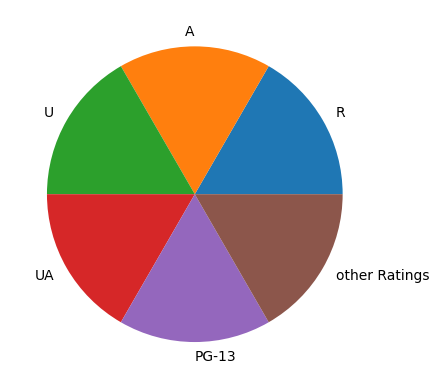

In [10]:
fig, ax = plt.subplots()
ax.pie(list(_['Certificate'].value_counts()), labels=list(_['Certificate'].value_counts().index))
plt.show()

In [11]:
_ = pd.DataFrame(df.Director.value_counts()).reset_index()
_.groupby('count').count()

,Director
count,
1,2844
2,674
3,334
4,213
5,135
6,90
7,58
8,47
9,29


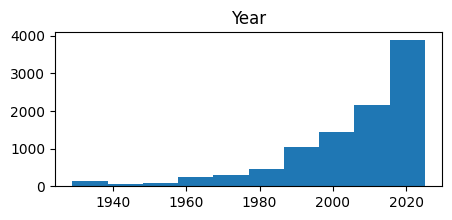

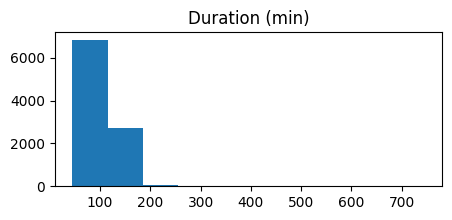

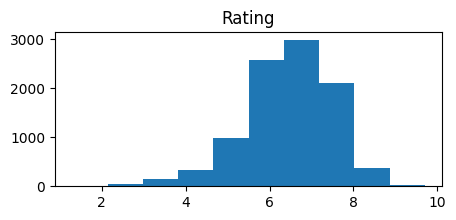

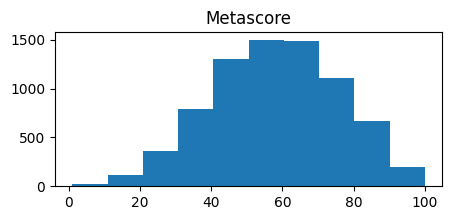

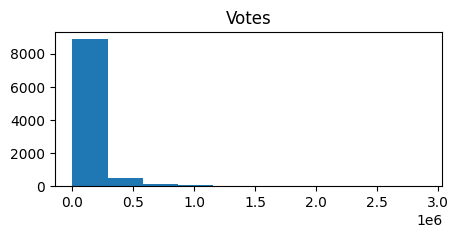

In [12]:
for col in df[num_feat]:
    plt.figure(figsize=(5, 2))
    plt.hist(df[col])
    plt.title(col)
    plt.show()

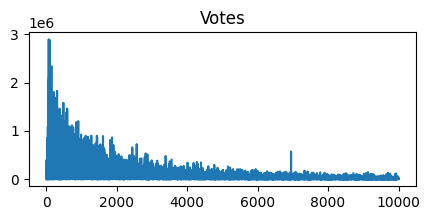

In [13]:
# Perhaps, Votes feature is a misleding factor if not taken to log.
plt.figure(figsize=(5, 2))
plt.plot(df['Votes'])
plt.title(col)
plt.show()

In [14]:
# Make visualizations based on that notebook.
# Split Genre features
# Convert Votes to log (scale other things) and correct all handling missing values. 
# Correctly encode categorical vars.
# Discard most of the Directors if Directors added.